In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sheets_dict = pd.read_excel('E8_topic_A__Students_characteristics.xlsx',sheet_name=None)
gender_df = sheets_dict['sex_s']

In [2]:
#shorten 'indicator item' values
'''
M = Male
F = Female
Other = Other
none = Prefer not to assign myself to the categories offered
'''
gender_df['Unnamed: 9'] = gender_df['Unnamed: 9'].astype('string')
for i in range(0,len(gender_df)):
    current_object =gender_df.at[i,'Unnamed: 9']
    if pd.isna(current_object):
        gender_df.loc[i,'Unnamed: 9'] = 'nan'
        continue
    if current_object=='Female':
        gender_df.loc[i,'Unnamed: 9'] = 'F'
    elif current_object=='Male':
        gender_df.loc[i,'Unnamed: 9'] = 'M'
    elif current_object=='Prefer not to assign myself to the categories offered':
        gender_df.loc[i,'Unnamed: 9'] = 'none'
        
#rename weird columns
gender_df.rename(columns={gender_df.columns[3]:'Unnamed: 3'},inplace=True)

#drop useless columns (useless for our )
drop_rows = ['Educational origin ','Location previous degree ','Mental well-being ',
             'Having studied abroad during BA studies ',
             'Having studied abroad during MA studies ',
             'Temporary enrolment abroad ',
             'Pre-covid student ',
             'Online vs. in person teaching ',
             'Sex (incl. prefer not to assign to any category offered) ',
             "Sex (incl. 'other')  ",
             'ETER: Right to award PhD ',
             'ETER: Total academic personnel (FTE) ',
             'ETER: Number of students by academic staff (FTE) ',
             'ETER: Number of master students by all students ',
             'ETER: Concentration of subjects ',
             'ETER: Number of PhD divided by all students ',
             'ETER: Relative specialisation in STEM ',
             'Experience abroad ',
             'Relationship job and studies ',
             'Transition into Master programme ',
             'Sex ',
             'Impairments limiting in studies ' ]

for i in range (0,len(drop_rows)):
    gender_df = gender_df[gender_df['Unnamed: 3']!=drop_rows[i]]

#delete empty rows and columns
gender_df = gender_df.iloc[2:].reset_index(drop=True)
gender_df = gender_df.dropna(axis=1,how='all')
gender_df = gender_df.dropna(axis=0,how='all')

#add row for later column names
gender_df['column_names']=gender_df.apply(lambda row: f"{row['Unnamed: 3']}, {row['Unnamed: 5']}, {row['Unnamed: 9']}",axis=1).astype('string')

#turn df
gender_df = gender_df.T.reset_index(drop=True)

#rename columns
for i in range (0,len(gender_df.columns)):
    gender_df.rename(columns={gender_df.columns[i]:gender_df.iloc[34,i]},inplace=True)
    
#delete useless rows and columns
gender_df = gender_df.drop(34).reset_index(drop=True) #last row
gender_df = gender_df.iloc[9:].reset_index(drop=True) #first 8 rows
gender_df = gender_df.drop(['nan, nan, nan'], axis=1).reset_index(drop=True)

#rename first column
gender_df.rename(columns={gender_df.columns[0]:'country'},inplace=True)

#handle missing data
gender_df.replace('t.f.c.', np.nan, inplace = True)

#change all datatypes if column has numeric values
for col in gender_df.columns:
    if pd.to_numeric(gender_df[col], errors='coerce').notna().all():
        gender_df[col] = gender_df[col].astype(float)

C:\Users\thorb\AppData\Local\Temp\ipykernel_11380\513359871.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_df.replace('t.f.c.', np.nan, inplace = True)


In [3]:
print(list(gender_df.columns))

['country', 'All students , All students, F', 'All students , All students, M', 'All students , All students, Other', 'All students , All students, none', 'Age group , < 22 years, F', 'Age group , < 22 years, M', 'Age group , < 22 years, Other', 'Age group , < 22 years, none', 'Age group , 22 - 24 years, F', 'Age group , 22 - 24 years, M', 'Age group , 22 - 24 years, Other', 'Age group , 22 - 24 years, none', 'Age group , 25 - 29 years, F', 'Age group , 25 - 29 years, M', 'Age group , 25 - 29 years, Other', 'Age group , 25 - 29 years, none', 'Age group , 30 years and older, F', 'Age group , 30 years and older, M', 'Age group , 30 years and older, Other', 'Age group , 30 years and older, none', 'Educational background , Low education background (ISCED 0-2), F', 'Educational background , Low education background (ISCED 0-2), M', 'Educational background , Low education background (ISCED 0-2), Other', 'Educational background , Low education background (ISCED 0-2), none', 'Educational backg

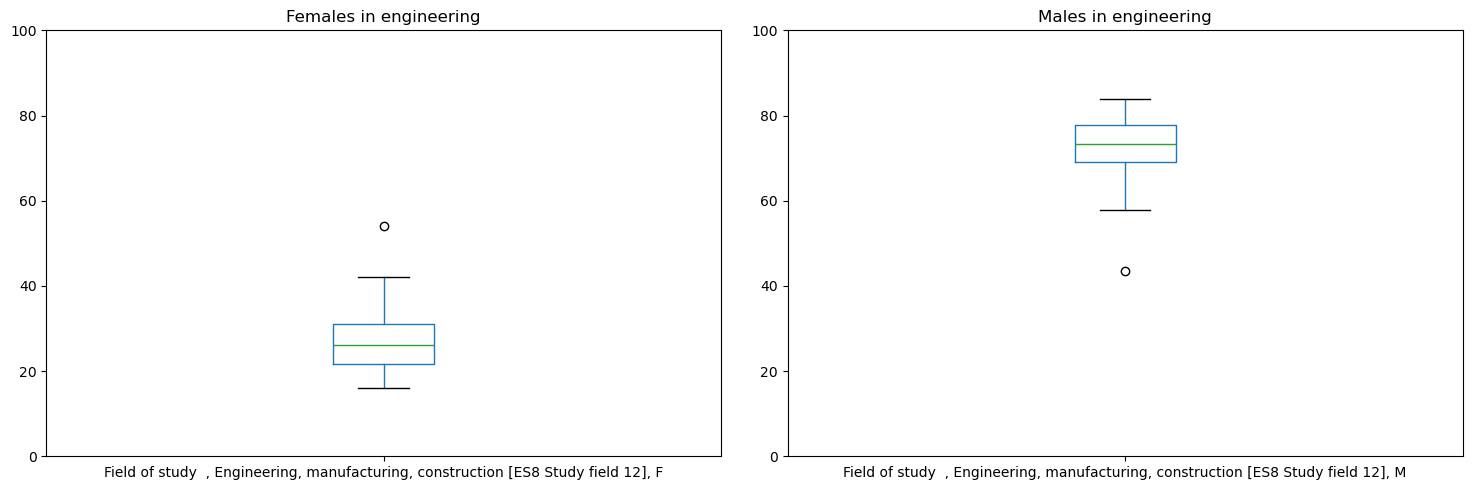

In [27]:
#boxplot definition
def comparableBoxplots(column1, title1, column2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    gender_df.boxplot(column=column1, ax=axes[0], grid=False)
    axes[0].set_title(title1)
    axes[0].set_ylim(0, 100)


    gender_df.boxplot(column= column2, ax=axes[1], grid=False)
    axes[1].set_title(title2)
    axes[1].set_ylim(0, 100)

    # Show the plots
    plt.tight_layout()
    plt.show()
comparableBoxplots('Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], F', 'Females in engineering', 'Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], M', 'Males in engineering')

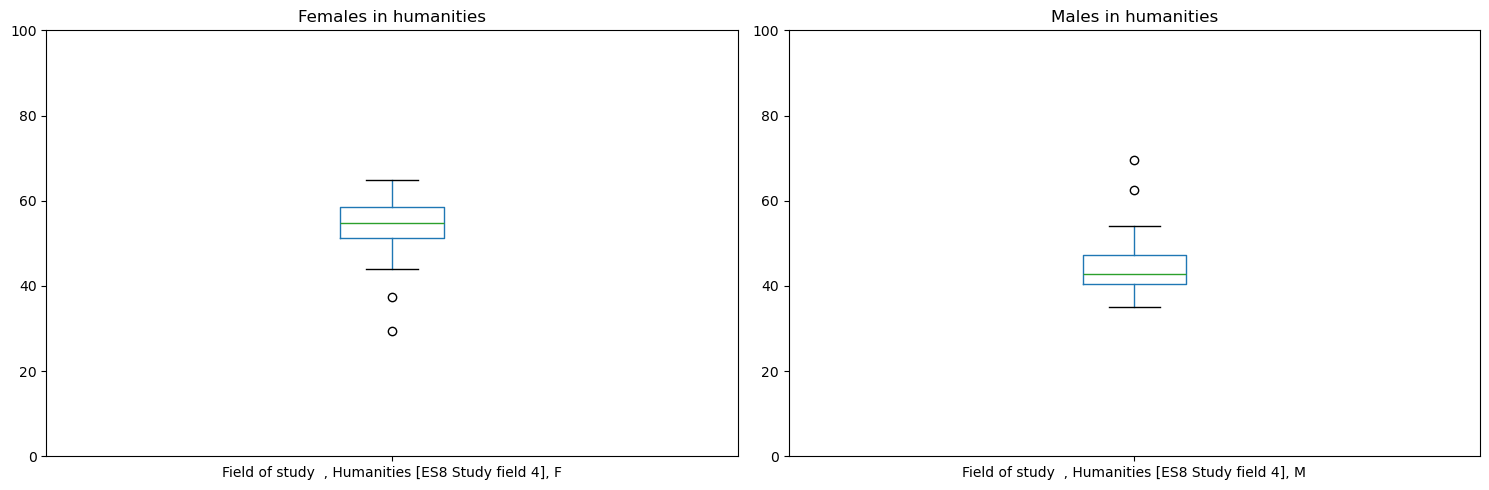

In [29]:
#humanities boxplots
comparableBoxplots('Field of study  , Humanities [ES8 Study field 4], F',
                   'Females in humanities', 'Field of study  , Humanities [ES8 Study field 4], M', 'Males in humanities')

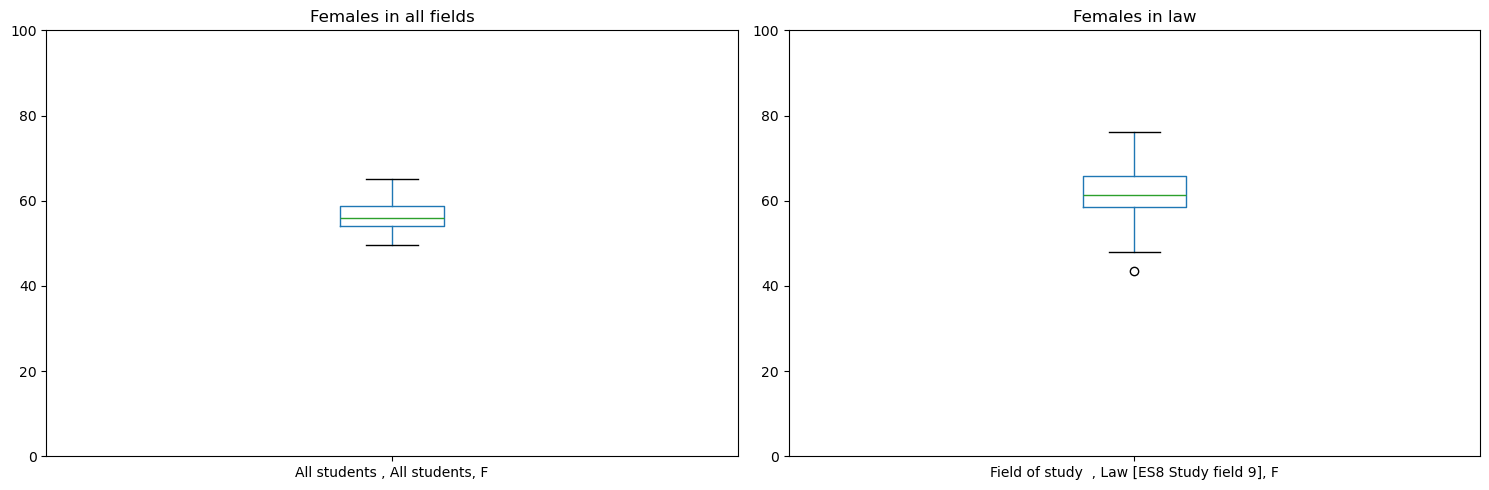

In [30]:
#more boxplots
comparableBoxplots('All students , All students, F', 'Females in all fields', 'Field of study  , Law [ES8 Study field 9], F', 'Females in law')

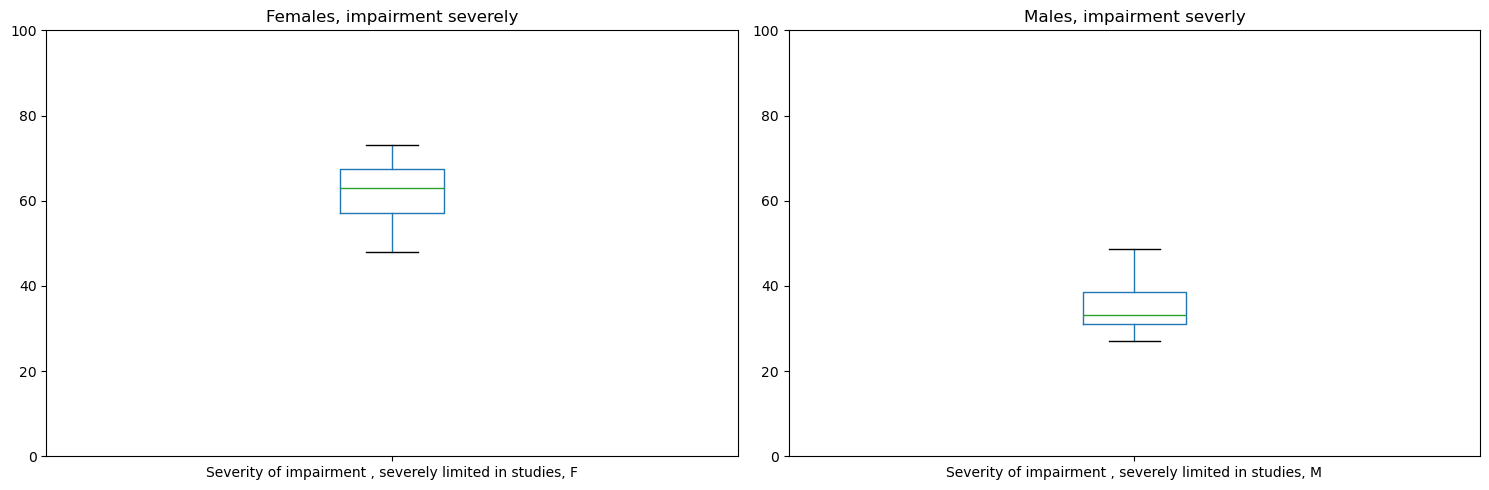

In [31]:
#impairment boxplots
comparableBoxplots('Severity of impairment , severely limited in studies, F', 'Females, impairment severely',
                   'Severity of impairment , severely limited in studies, M', 'Males, impairment severly')

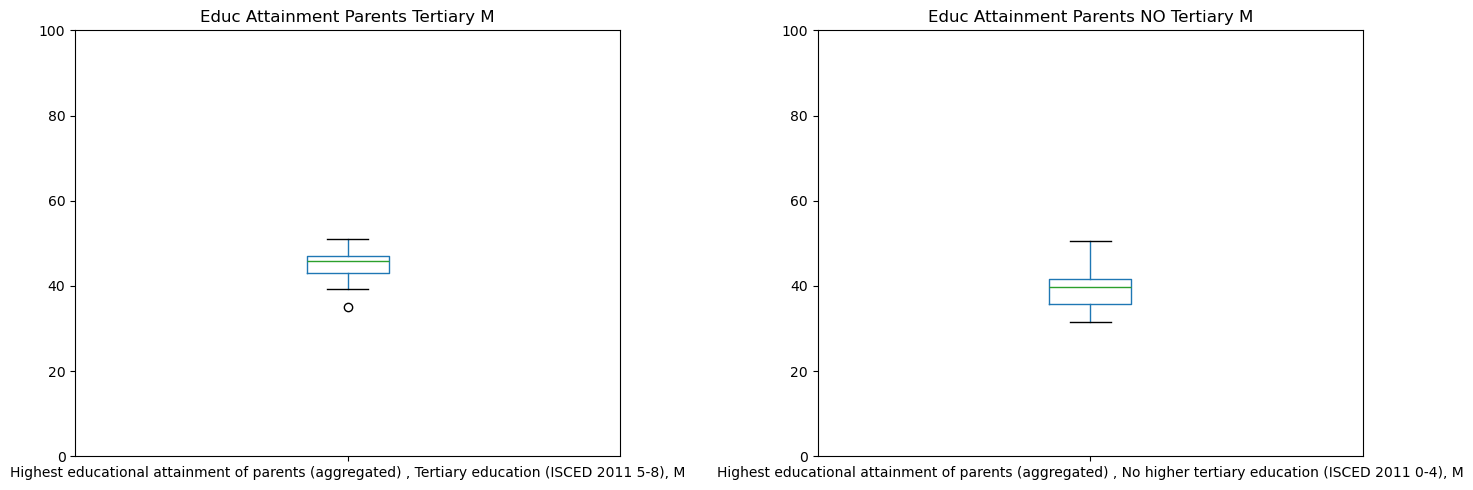

In [32]:
#parents boxplots
comparableBoxplots('Highest educational attainment of parents (aggregated) , Tertiary education (ISCED 2011 5-8), M',
                   'Educ Attainment Parents Tertiary M',
                   'Highest educational attainment of parents (aggregated) , No higher tertiary education (ISCED 2011 0-4), M',
                   'Educ Attainment Parents NO Tertiary M')

In [21]:
value = gender_df[(gender_df['Severity of impairment , severely limited in studies, F'] < 50)]
print(value[["country", 'Severity of impairment , severely limited in studies, F' ]])

   country  Severity of impairment , severely limited in studies, F
21      PT                                          48.068338      


In [8]:
# Finding outlier countries in a column
def find_outliers(column_name):
    Q1 = gender_df[column_name].quantile(0.25)
    Q3 = gender_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = gender_df[(gender_df[column_name] < lower_bound) | (gender_df[column_name] > upper_bound)]

    print(outliers[["country", column_name]])
find_outliers('Field of study  , Humanities [ES8 Study field 4], M')

   country  Field of study  , Humanities [ES8 Study field 4], M
22      RO                                          69.580076  
24      SK                                          62.546445  


In [9]:
find_outliers('Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], F')

  country  \
6      ES   

   Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], F  
6                                           54.09119                                   
